In [7]:
import numpy as np

def generate_data(n, target_mean, target_median, target_std, min_value=0, max_value=100):
    # Generate random data
    data = np.random.normal(loc=target_mean, scale=target_std, size=n)

    # Adjust the median
    current_median = np.median(data)
    data += (target_median - current_median)

    # Adjust the standard deviation
    current_std = np.std(data)
    data *= (target_std / current_std)

    # Adjust the mean
    current_mean = np.mean(data)
    data += (target_mean - current_mean)

    # Clip the data to be within the specified range
    data = np.clip(data, min_value, max_value)

    return data

n = 100
target_mean = 78
target_median = 65
target_std = 16

data = generate_data(n, target_mean, target_median, target_std)
print(data)


[ 83.42558971  77.22618239  80.73246828  91.15015242  71.43946884
  61.08366977  51.15190069 100.          87.31425306  92.10092723
  48.04933082  84.80322779  73.36413694  70.23271634  73.39622428
  78.82878682  66.4956457   71.40610745  75.09000281  61.21100438
  81.04513334  74.00177229  81.27460463  95.08409881 100.
  72.30632846  67.32171994  64.5322294   60.11100871  91.27084979
  66.17192289  88.61592922  74.74305841  45.7959313   66.96234614
  70.36909003 100.          70.2955258   82.60875195  80.21835338
  50.37461445  61.0593604   59.88227952  84.80864718  53.31666168
 100.          94.46414952 100.          83.09974618  57.01606809
  52.02811689  93.94930368  91.15782668  97.91156465  80.76072174
  93.58518386  84.52306588  62.6773104  100.          74.39592587
 100.          78.47149523  56.90888316  72.19185344  84.24271066
  91.47693325  91.8179543   82.62312159  73.43089399 100.
  61.23845451  97.45560838  79.7723882   56.24657842  71.41371639
  82.31294622  71.18735693

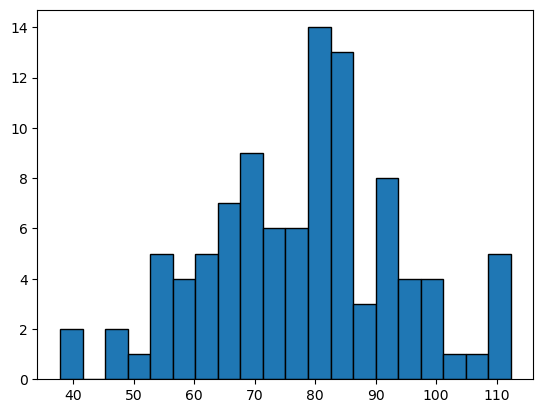

In [6]:
import matplotlib.pyplot as plt
plt.hist(data, bins=20, edgecolor='black')
plt.show()
